In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pickle

In [2]:
pwd

'E:\\Desktop\\semester 12\\CVAPR\\CIFAR -10'

In [3]:
DATASET = 'train_sep'

In [4]:
CATEGORIES = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [5]:
train_data = []
IMG_SIZE = 100

for c in CATEGORIES:
    path = os.path.join(DATASET, c)
    
    class_name = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        try:
            img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            img_resized = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
            train_data.append([img_resized, class_name])
        except Exception as e:
            pass

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1274.87it/s]


In [6]:
len(train_data)

50000

In [7]:
import random
random.shuffle(train_data)

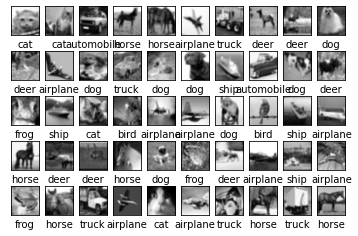

In [8]:
for i in range(50):
    plt.subplot(5,10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_data[i][0], cmap=plt.cm.gray)
    plt.xlabel(CATEGORIES[train_data[i][1]])
    
plt.show()

In [9]:
X = []
y = []

for f,l in train_data:
    X.append(f)
    y.append(l)

In [10]:
print(X[0].shape)
tmp = X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(tmp.shape)

(100, 100)
(1, 100, 100, 1)


In [11]:
X = np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE, 1)
print(X.shape)

(50000, 100, 100, 1)


In [12]:
pout = open("X.pickle","wb")
pickle.dump(X, pout)
pout.close()

In [13]:
pout = open("y.pickle","wb")
pickle.dump(y, pout)
pout.close()

In [14]:
pin = open("X.pickle","rb")
X = pickle.load(pin)

pin = open("y.pickle","rb")
y = pickle.load(pin)

In [15]:
train_set = X[0:40000]
test_set = X[40000:50000]

In [16]:
print(len(train_set), len(test_set))

40000 10000


In [17]:
train_label = y[0:40000]
test_label = y[40000:50000] 

In [18]:
print(len(train_label), len(test_label))

40000 10000


In [19]:
test_data = []
IMG_SIZE = 120


for i, img in enumerate(test_set):
    try:
        img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        test_data.append([img_resized, test_label[i]])
    except Exception as e:
        pass

print(len(test_data))

10000


dog


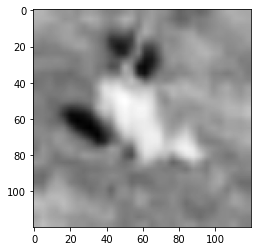

In [20]:
plt.imshow(test_data[9999][0], cmap=plt.cm.gray)
print(CATEGORIES[test_data[9999][1]])

In [21]:
train_data = []
IMG_SIZE = 120


for i, img in enumerate(train_set):
    try:
        img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        train_data.append([img_resized, train_label[i]])
    except Exception as e:
        pass

print(len(train_data))

40000


cat


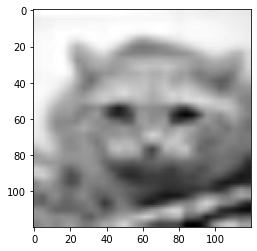

In [22]:
plt.imshow(train_data[0][0], cmap=plt.cm.gray)
print(CATEGORIES[train_data[0][1]])

In [23]:
tX = []
ty = []

for f,l in train_data:
    tX.append(f)
    ty.append(l)

In [24]:
print(tX[0].shape)
tmp = tX[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(tmp.shape)

(120, 120)
(1, 120, 120, 1)


In [25]:
print(len(tX),len(ty))

40000 40000


In [26]:
tX = np.array(tX).reshape(-1,IMG_SIZE, IMG_SIZE, 1)
print(tX.shape)

(40000, 120, 120, 1)


In [27]:
pout = open("train_x.pickle","wb")
pickle.dump(tX, pout)
pout.close()

pout = open("train_y.pickle","wb")
pickle.dump(ty, pout)
pout.close()

In [28]:
pin = open("train_x.pickle","rb")
tX = pickle.load(pin)

pin = open("train_y.pickle","rb")
ty = pickle.load(pin)

In [35]:
plt.figure(figsize=(15,15))
tmpIndex = 1
result = [];
for i in range(1):
    
    CATEGORIES[test_data[i][1]]  
    
    arr = []
    for j,k in tqdm(enumerate(tX)):
        dist_arr = np.abs(test_data[i][0] - tX[j]) 
        dist = np.sum(dist_arr) # mathatten / L1 distance
        arr.append(dist)
    
    
    print(arr)    
    min_index = np.argmin(arr)    
    
    result.append([CATEGORIES[test_data[i][1]], tX[min_index], CATEGORIES[ty[min_index]]])
    
    print(result)
    
    


40000it [09:06, 73.19it/s]


[146056304, 167364752, 188929984, 248958952, 172685016, 266967760, 198704232, 231190080, 156938168, 202667976, 193473128, 130259280, 167871104, 160265736, 213245696, 209482280, 190706280, 225383976, 181470088, 162366952, 209781320, 191731080, 203173504, 149309944, 227807184, 220799232, 251069024, 141742456, 230801096, 159162584, 231715872, 133978088, 148784560, 206328600, 152320656, 138815680, 184934064, 202126704, 228455776, 180718792, 241120632, 183881408, 195630568, 131212120, 216294984, 239069184, 169033448, 176270728, 206021832, 202958504, 161387184, 195601304, 194502536, 163099720, 193234512, 296939936, 195216512, 208565552, 180284448, 160103488, 229644280, 147365720, 163691200, 231757696, 183080512, 163586264, 261821344, 192566208, 157903232, 141930328, 252414464, 175806568, 225285488, 284114000, 215665568, 170599968, 200093944, 194908032, 215138152, 204524248, 176999544, 132169712, 174442904, 218942296, 165084048, 213654536, 140727872, 241574120, 185539928, 193052160, 223403464

<Figure size 1080x1080 with 0 Axes>